In [83]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
%matplotlib inline

In [84]:
from sklearn.cluster import KMeans

In [85]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'Spotify_Dataset_V3.csv')
df = pd.read_csv(data_path, delimiter=';')
df.head()


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


<Axes: xlabel='Loudness'>

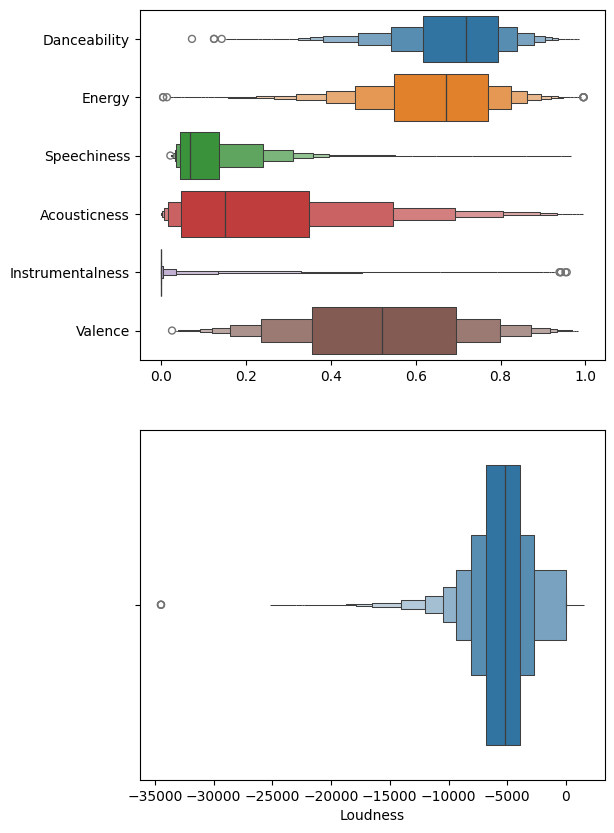

In [108]:
df_feature = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Loudness']].copy()

plt.figure(figsize=(6, 10))
plt.subplot(211)
sns.boxenplot(df_feature.drop(columns="Loudness"), orient="y")

plt.subplot(212)
sns.boxenplot(df["Loudness"],orient="y")

<Axes: xlabel='Loudness', ylabel='Count'>

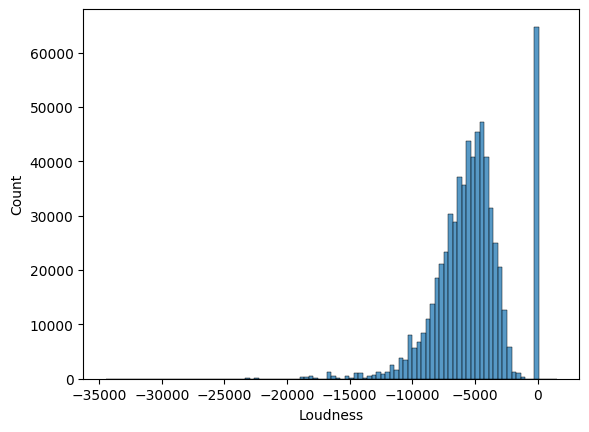

In [88]:
sns.histplot(df["Loudness"], bins=100)

In [153]:
lower_quantile = 0.05
upper_quantile = 0.90

lower_bounds = df_feature.quantile(lower_quantile)
upper_bounds = df_feature.quantile(upper_quantile)
outliers = ((df_feature < lower_bounds) | (df_feature > upper_bounds)).any(axis=1)
df_feature_clean = df_feature[~outliers].copy()
df_feature_clean = df_feature_clean.drop(columns="Loudness").copy()
df_feature_clean.describe()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
count,258105.000000,258105.000000,258105.000000,258105.000000,258105.000000,258105.000000
mean,0.699874,0.674708,0.087153,0.178273,0.000035,0.517727
std,0.095420,0.107734,0.056446,0.151342,0.000184,0.170688
min,0.442000,0.378000,0.031000,0.005000,0.000000,0.146000
25%,0.635000,0.601000,0.045000,0.052000,0.000000,0.394000
50%,0.712000,0.690000,0.066000,0.136000,0.000000,0.513000
75%,0.778000,0.765000,0.114000,0.265000,0.000000,0.661000
max,0.853000,0.837000,0.264000,0.583000,0.001000,0.823000


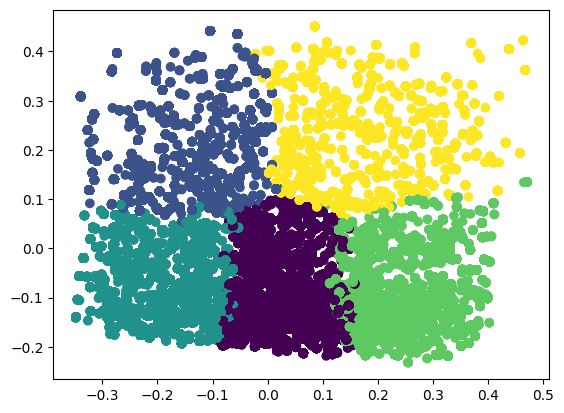

In [154]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(df_feature_clean)

df_cluster = df_feature_clean.copy()
df_cluster['cluster'] = kmeans.labels_
labels = kmeans.labels_

pca = PCA(n_components=3)  # Reduce to 2 dimensions
X_2d = pca.fit_transform(df_feature_clean)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')

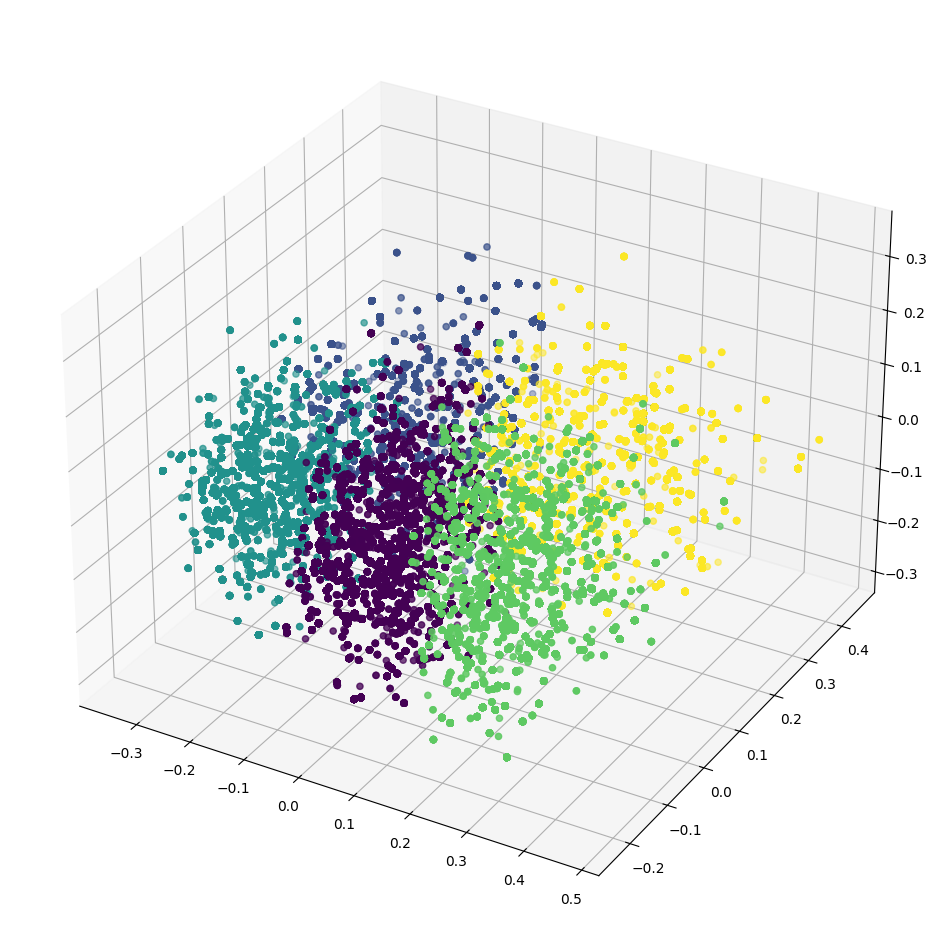

In [155]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2d[:, 0], X_2d[:, 1], X_2d[:, 2], c=labels)
plt.show()